# Automata Celular Bidimensional:
## Estados Iniciales [-1 , 1]

## Regla Totalística:
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

def inicial_random(tamano):
    np.random.seed(218)
    estado_inicial_r = np.random.choice([-1, 1], size=(tamano, tamano), p=[0.4, 0.6])
    return estado_inicial_r

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return celda_actual

def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def visualizar_automata(automata, generaciones, tamano):
    fig, axs = plt.subplots(1, generaciones, figsize=(15, 15))

    for t in range(generaciones):
        axs[t].imshow(automata[t], cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)
        axs[t].set_xlabel('X')
        axs[t].set_ylabel('Y')
        axs[t].set_title(f'Generación {t} \nTamaño: {tamano}')
        axs[t].set_xticks([])
        axs[t].set_yticks([])

    plt.show()

# Ejemplo de uso
tamano = 10
generaciones = 60
estado_inicial = inicial_random(tamano)

automata = automata_celular(tamano, generaciones, estado_inicial)
## Generación visualización condicionada a cantidad de generaciones.
#visualizar_automata(automata, generaciones, tamano) 



### Creación Gif:

In [ ]:
import imageio

def crear_gif(automata, tamano, generaciones):
    nombre_archivo = f"BCA_s{tamano}_gen{generaciones}.gif"

    imagenes = []
    for idx, matriz in enumerate(automata):
        imagen = plt.imshow(matriz, cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)
        titulo = f"Generación {idx} \nTamaño Grilla {tamano}"
        plt.title(titulo)
        plt.axis('on')
        filename = "temp.png"
        plt.savefig(filename)
        plt.close()

        image = imageio.v2.imread(filename)
        os.remove(filename)
        imagenes.append(image)

    imageio.mimsave(nombre_archivo, imagenes, fps=2) #con fps regulo la tasa de imagenes por segundo

In [ ]:
crear_gif(automata, tamano, generaciones)

In [ ]:
automata [0]

# Generación Múltiples Combinaciones:

## Regla Totalística:
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

KeyboardInterrupt: 

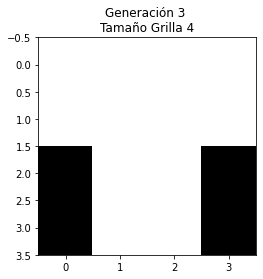

In [36]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return celda_actual
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata


def crear_gif(automata, tamano, generaciones, idx, directorio):
    nombre_archivo = f"{directorio}/BCA_s{tamano}_gen{generaciones}_{idx}.gif"

    imagenes = []
    for t, matriz in enumerate(automata):
        plt.imshow(matriz, cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)
        titulo = f"Generación {t} \nTamaño Grilla {tamano}"
        plt.title(titulo)
        plt.axis('on')
        filename = "temp.png"
        plt.savefig(filename)
        plt.close()

        image = imageio.v2.imread(filename)
        os.remove(filename)
        imagenes.append(image)

    imageio.mimsave(nombre_archivo, imagenes, fps=2)   # Con fps regulo la tasa de imágenes por segundo
    

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

directorio = f"BCA_s{tamano}_gen{generaciones}"
if not os.path.exists(directorio):
    os.makedirs(directorio)

for idx, estado in enumerate(estados):
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    crear_gif(automata, tamano, generaciones, idx, directorio)


### Métricas

In [6]:
def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

### Cantidad de Puntos Fijos:

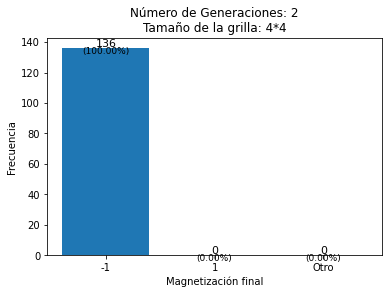

In [48]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 2

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini > -1 and magnetizacion_ini <= -0.75:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Número de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

/var/folders/lg/6xllmg393z39__f392znxj000000gn/T/ipykernel_8281/1553057581.py:59: RuntimeWarning: Mean of empty slice
  magnetizaciones_iniciales = [np.nanmean(rango) for rango in rangos_magnetizacion]


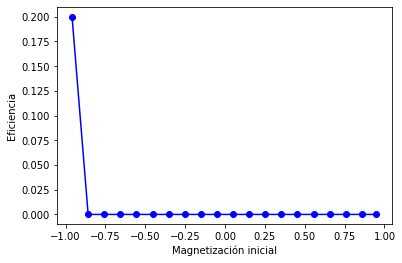

In [56]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

def dividir_rangos(magnetizaciones):
    rangos = np.arange(-1, 1.1, 0.1)
    magnetizaciones_divididas = [[] for _ in range(len(rangos))]
    
    for magnetizacion_ini in magnetizaciones:
        for i in range(len(rangos) - 1):
            if rangos[i] <= magnetizacion_ini < rangos[i + 1]:
                magnetizaciones_divididas[i].append(magnetizacion_ini)
                break
    
    return magnetizaciones_divididas

def calcular_eficiencia(magnetizaciones_divididas):
    rangos_magnetizacion = []
    eficiencias = []
    
    for magnetizaciones_rango in magnetizaciones_divididas:
        estados_finales_punto_fijo = 0
        
        for magnetizacion_ini in magnetizaciones_rango:
            estado_inicial = np.array([magnetizacion_ini])
            automata = automata_celular(1, generaciones, estado_inicial)
            magnetizacion_fin = magnetizacion_final(automata)
            
            if magnetizacion_fin == -1 or magnetizacion_fin == 1:
                estados_finales_punto_fijo += 1
        
        if len(magnetizaciones_rango) > 0:
            eficiencia = estados_finales_punto_fijo / len(magnetizaciones_rango)
        else:
            eficiencia = np.nan
        
        rangos_magnetizacion.append(magnetizaciones_rango)
        eficiencias.append(eficiencia)
    
    return rangos_magnetizacion, eficiencias


def graficar_eficiencia(rangos_magnetizacion, eficiencias):
    magnetizaciones_iniciales = [np.nanmean(rango) for rango in rangos_magnetizacion]
    plt.plot(magnetizaciones_iniciales, eficiencias, marker='o', linestyle='-', color='blue')
    plt.xlabel("Magnetización inicial")
    plt.ylabel("Eficiencia")
    plt.show()


# Dividir las magnetizaciones iniciales en rangos
magnetizaciones_divididas = dividir_rangos(magnetizaciones_iniciales)

# Calcular la eficiencia para cada rango
rangos_magnetizacion, eficiencias = calcular_eficiencia(magnetizaciones_divididas)

# Graficar la eficiencia
graficar_eficiencia(rangos_magnetizacion, eficiencias)